In [2]:
import numpy as np
import matplotlib.pyplot as plt

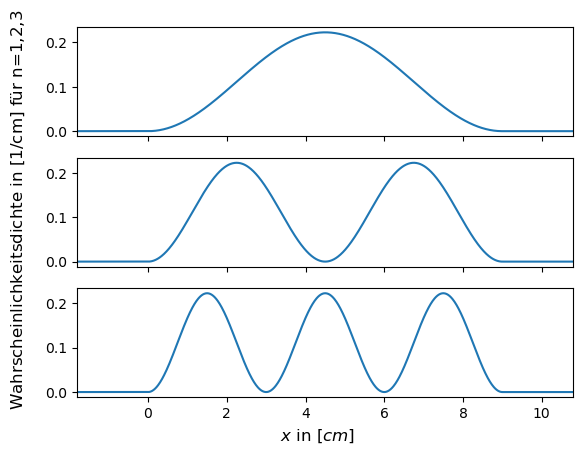

In [6]:
L = 9
psi = lambda x, n: np.sqrt(2/L) * np.sin(n * np.pi / L * x)

X = np.linspace(*(lim:=[-.2*L, 1.2*L]), N:=1000)
Y = np.array([psi(X,n) for n in (1,2,3)]) **2
Y[:, (0>X) | (X>L)] = 0

fig, axes = plt.subplots(3,1,sharex=True)
axes[0].set_xlim(*lim)
fig.supxlabel(r"$x$ in $[cm]$")
fig.supylabel(r"Wahrscheinlichkeitsdichte in $[1/\mathrm{cm}]$ für n=1,2,3")

for n,ax in enumerate(axes):
    ax.plot(X,Y[n])

fig.savefig("2.svg")

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [72]:
d1, d2 = 2.13e-10, 1.23e-10

U = np.array([3.0, 3.5, 4.0, 4.5, 5.0]) * 1e3

D1 = np.array([2.8, 2.7, 2.6, 2.5, 2.4]) * 1e-2
D2 = np.array([5.0, 4.7, 4.4, 4.1, 3.9]) * 1e-2

In [74]:
R1, R2 = D1/2, D2/2
sqrt_U_inv = U**(-1/2)

fit_R1 = linregress(sqrt_U_inv, R1)
fit_R2 = linregress(sqrt_U_inv, R2)

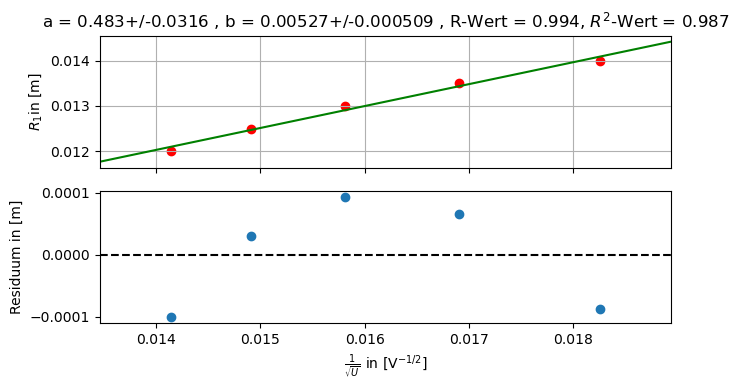

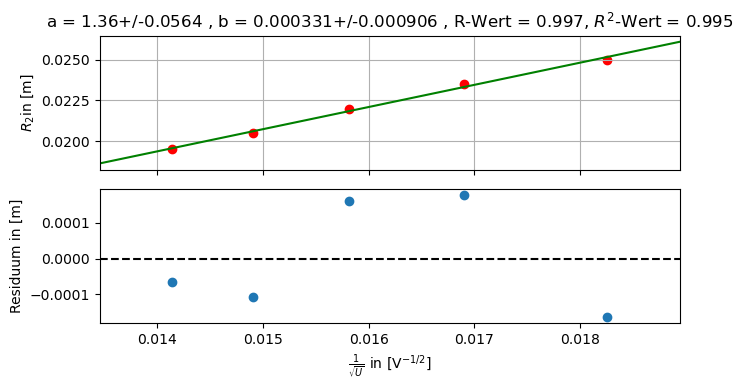

In [97]:
def create_plot(X, Y, fit, filename=None, ylabel = "Y"):
    fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(7,4), sharex=True)
    ax1.scatter(X, Y,  c="r")
    
    lin_X = np.array([min(X)-(max(X)-min(X))/6 , max(X)+(max(X)-min(X))/6])
    ax1.plot(lin_X, fit[0] * lin_X + fit[1], c="g", label="Fit: T")

    ax2.axhline(y=0, c="black", linestyle="--")
    ax2.scatter(X, Y - (fit[0] * X + fit[1]))
    
    ax1.set_title(f"a = {fit[0]:.3}+/-{fit[4]:.3} , b = {fit[1]:.3}+/-{fit.intercept_stderr:.3} , R-Wert = {fit[2]:.3}, $R^2$-Wert = {fit[2]**2:.3}")
    ax1.grid()
    ax1.set_xlim(lin_X)
    # ax1.set_xlim(-1,max(X)+1)
    ax2.set_xlabel(r"$\frac{1}{\sqrt{U}}$ in $\left[\mathrm{V}^{-1/2}\right]$")
    ax1.set_ylabel(ylabel + r"in [m]")
    ax2.set_ylabel("Residuum in [m]")
    fig.subplots_adjust(hspace=0)
    plt.tight_layout()

    if filename:
        plt.savefig(filename + ".svg")

create_plot(sqrt_U_inv, R1, fit_R1, "fit_R1", "$R_1$")
create_plot(sqrt_U_inv, R2, fit_R2, "fit_R2", "$R_2$")

In [100]:
import scipy.constants as c
from uncertainties import ufloat

L = 13.3e-2
a1 = ufloat(fit_R1[0], fit_R1[4])
a2 = ufloat(fit_R2[0], fit_R2[4])

h1 = (a1 * d1 * np.sqrt(2* c.m_e * c.e)) / L
h2 = (a2 * d2 * np.sqrt(2* c.m_e * c.e)) / L

print(c.h)
for i,h in enumerate((h1,h2)):
    print(f"$h_{i+1}$ & ${h}$ & ${1-c.h/h.n:.3}$ & ${np.abs((c.h - h.n)/h.s):.3}\\cdot\\sigma_{{h_{i+1}}}$\\\\\\hline")

6.62607015e-34
$h_1$ & $(4.18+/-0.27)e-34$ & $-0.586$ & $8.95\cdot\sigma_{h_1}$\\\hline
$h_2$ & $(6.80+/-0.28)e-34$ & $0.0251$ & $0.604\cdot\sigma_{h_2}$\\\hline
